In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
n = 15
variant = (n+4)%5+1
variant

5

In [6]:
# 2. output last 8 rows of ./dataset/NationalNames.csv 
df = pd.read_csv('dataset/NationalNames.csv')
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [7]:
# 4. show general information about the data in the set
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [8]:
# 6. show amount of unique female and male names in the set
unique_names_by_gender = df.groupby('Gender')['Name'].nunique()
unique_names_by_gender

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [9]:
# 7. filter the dataset for male names in the year 2010
top_male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]
top_5_male_names_2010 = top_male_names_2010.sort_values(by='Count', ascending=False).head(5)

top_5_male_names_2010


,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [10]:
# 9. Find the minimum value of the 'Count' column
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]

min_count_records


254615

In [11]:
# 10. Group the dataset by 'Year' and count unique names
unique_names_per_year = df.groupby('Year')['Name'].nunique()
unique_names_per_year


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [12]:
# 15. Find the total amount of births for each year
total_births_per_year = df.groupby('Year')['Count'].sum()
total_births_per_year

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [13]:
# 16. Find the year with the highest number of births
year_highest_births = total_births_per_year.idxmax()
int(year_highest_births)

1957

In [14]:
# 17. Group by 'Year' and 'Gender' to get the total count
births_by_gender_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Display the first 5 rows
births_by_gender_year.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [15]:
# 18. Find the year when girls outnumber
years_more_girls = (births_by_gender_year['F'] > births_by_gender_year['M']).sum()
int(years_more_girls)

54

In [16]:
# 20. Count unique names that appear for both genders
unique_gender_neutral_names = df.groupby('Name')['Gender'].nunique()
gender_neutral_name_count = (unique_gender_neutral_names > 1).sum()
int(gender_neutral_name_count)

10221

In [17]:
# 21. Find amount of boys named Barbara
barbara_boys = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]

# Sum the occurrences if there's a count column representing the frequency for each entry
total_barbara_boys = barbara_boys['Count'].sum()

# Display the result
int(total_barbara_boys)

4139

In [18]:
# 22. Count the number of unique years in the dataset
years_observed = df['Year'].nunique()
"Спостереження проводилось {} років".format(years_observed)

'Спостереження проводилось 135 років'

In [19]:
# 23. Calculate the total number of unique years in the dataset
total_years = df['Year'].nunique()

# Group by 'Name' and aggregate to count unique years and unique genders for each name
name_stats = df.groupby('Name').agg(
    unique_years=('Year', 'nunique'),     # Count unique years each name appears in
    unique_genders=('Gender', 'nunique')  # Count unique genders each name appears with
).reset_index()

# Filter names that appear in all years and have more than one gender (gender-neutral)
gender_neutral_names = name_stats[
    (name_stats['unique_years'] == total_years) & (name_stats['unique_genders'] > 1)
    ]

# Count occurrences of each gender-neutral name in the original dataset
popular_gender_neutral_names = df[df['Name'].isin(gender_neutral_names['Name'])]['Name'].value_counts().reset_index()
popular_gender_neutral_names.columns = ['Name', 'Occurrences']  # Rename columns for readability

# Display the resulting table
popular_gender_neutral_names


,Name,Occurrences
0,William,270
1,James,270
2,Marion,270
3,Johnnie,270
4,Leslie,270
...,...,...
818,Aline,136
819,Newton,136
820,Ezekiel,136
821,Hans,136


In [20]:
# 22. Find the total number of unique years
total_years = df['Year'].nunique()

# Identify gender-neutral names that appear every year
gender_neutral_names = df.groupby('Name').filter(
    lambda x: x['Year'].nunique() == total_years and x['Gender'].nunique() > 1
)

# Count occurrences of each gender-neutral name and convert to a DataFrame
popular_gender_neutral_names = gender_neutral_names['Name'].value_counts().reset_index()
popular_gender_neutral_names.columns = ['Name', 'Occurrences']

# Display the result as a table
popular_gender_neutral_names

,Name,Occurrences
0,William,270
1,James,270
2,Marion,270
3,Johnnie,270
4,Leslie,270
...,...,...
818,Aline,136
819,Newton,136
820,Ezekiel,136
821,Hans,136


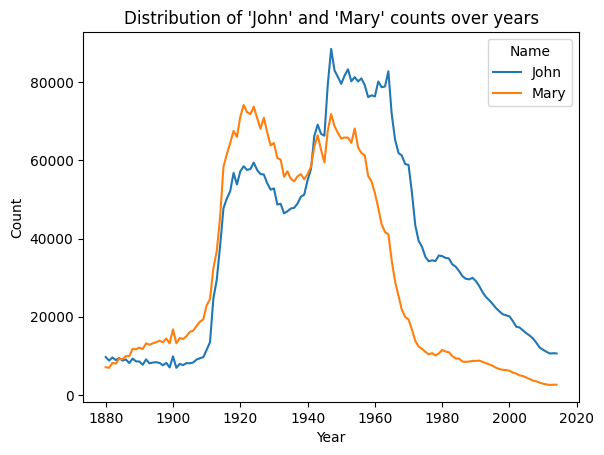

In [21]:
# 25. Filter data for names "John" and "Mary"
john_mary = df[df['Name'].isin(['John', 'Mary'])]

# Group by year and name, then sum counts
john_mary_counts = john_mary.groupby(['Year', 'Name'])['Count'].sum().unstack()

# Plot the counts over the years
john_mary_counts.plot()
plt.title("Distribution of 'John' and 'Mary' counts over years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Name")
plt.show()

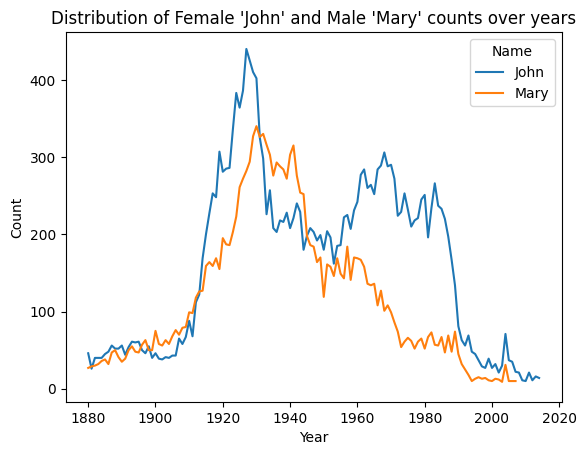

In [22]:
# 26. Filter data for female "John" and male "Mary"
john_female_mary_male = df[(df['Name'] == 'John') & (df['Gender'] == 'F') | (df['Name'] == 'Mary') & (df['Gender'] == 'M')]

# Group by year and name, then sum counts
john_female_mary_male_counts = john_female_mary_male.groupby(['Year', 'Name'])['Count'].sum().unstack()

# Plot the counts over the years
john_female_mary_male_counts.plot()
plt.title("Distribution of Female 'John' and Male 'Mary' counts over years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Name")
plt.show()

In [23]:
# 27. For each year, find the name with the highest count
most_popular_name_each_year = df.loc[df.groupby('Year')['Count'].idxmax(), ['Year', 'Name', 'Count']]

# Display the result
most_popular_name_each_year

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
